In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

$\sum_{i=1}^n (x_i - \bar{x}) = 0$

In [315]:
# Demonstrate the above

sample = np.random.randint(0, 100, 100)

print("THE SAMPLE IS:")
print(sample)

mean = np.mean(sample)
print("THE MEAN IS:")
print(mean)

print("Sum of all vals minus the mean is:")
print(round(sum([_ - mean for _ in sample])))

THE SAMPLE IS:
[15 50 31 51 70 89 31 66 75 95 66 84  9 78 58 56 18 28  0 70  1 53 23  2
 19 49 84 39 20 95 47 19 35 89 79 42 95 70 65 40 88 67 12 83 91 15 85 41
 41 86  3 95 84 80 27 10 53 37 88  9  8 16 70 40 46 47 56 47  4 68 65 20
 78 99 43 88 81 30 10  3 70 59 60 54  8 10 43 70 23 23  3 36 97 97  9 43
 23 47 63 95]
THE MEAN IS:
49.53
Sum of all vals minus the mean is:
-0.0


$S_{xx} = \sum_{i=1}^n (x_i - \bar{x})(x_i - \bar{x}) = \sum_{i=1}^n (x_i - \bar{x})^2$

In [316]:
# Demonstration of above

Sxx = sum([(_ - mean)**2 for _ in sample])

print(round(Sxx))

87949.0


$ \sigma^2 = \frac{S_{xx}}{n}$ i.e. the population variance

In [317]:
np.var(sample)

879.4890999999999

In [318]:
Sxx/len(sample)

879.4890999999994

$S^2 = \frac{S_{xx}}{n-1}$ i.e. sample variance

In [319]:
Sxx/(len(sample)-1)

888.3728282828278

In [320]:
np.var(sample, ddof=1)

888.3728282828282

In [321]:
0.2794**2

0.07806435999999999

In [322]:
145.1912**2

21080.484557440002

In [325]:
df = datasets.load_diabetes()

In [326]:
df = pd.DataFrame(df.data, columns=df.feature_names)

In [327]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [350]:
xx = df["bmi"]

In [351]:
yy = df["bp"]

$\bar{x}$

In [352]:
np.mean(xx)

-8.045349203335693e-16

$\hat{b}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$

In [353]:
b1 = sum([(x - np.mean(xx)) * (y - np.mean(yy)) for x,y in list(zip(xx,yy))])/sum([(x - np.mean(xx))**2 for x in xx])

In [354]:
b1

0.3954153211622333

$\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}$

In [355]:
b0 = np.mean(xx) - b1*np.mean(yy)

In [356]:
np.mean(xx)

-8.045349203335693e-16

$\hat{y}_i = \hat{b}_0 + \hat{b}_1 x_i$

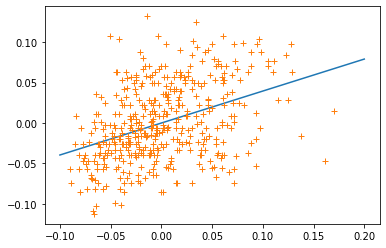

In [358]:
xline = np.linspace(-0.1,0.2,1000)

plt.plot(xline, [b0 + b1*x for x in xline])
plt.plot(xx, yy, "+")

$S_{xy} = \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})$  

$S_{xx} = \sum_{i=1}^n (x_i - \bar{x})^2$

$S_{x} = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n}}$

$S_{y} = \sqrt{\frac{\sum_{i=1}^n (y_i - \bar{y})^2}{n}}$

In [359]:
Sxy = sum([(x - np.mean(xx)) * (y - np.mean(yy)) for x,y in list(zip(xx,yy))])

Sxx = sum([(x - np.mean(xx))**2 for x in xx])

Sx = np.sqrt(sum([(x - np.mean(xx))**2 for x in xx])/(len(xx)))

Sy = np.sqrt(sum([(y - np.mean(yy))**2 for y in yy])/(len(yy)))

$\hat{b}_ 1 = \frac{S_{xy}}{S_{xx}}$

In [360]:
Sxy/Sxx

0.3954153211622333

$\hat{b}_1 = \frac{Cov(XY)}{S_x^2} = \frac{Cov(XY)}{\hat{\sigma^2}}$

In [361]:
(Sxy/len(xx))/Sx**2

0.39541532116223316

$RSS = \sum_{i=1}^n (y_i - \hat{y_i})^2$

$TSS = \sum_{i=1}^n (y_i - \bar{y_i})^2$

$R^2 = 1 - \frac{RSS}{TSS}$

$R = \sqrt{R^2}$

In [362]:
RSS = sum([(act - pred)**2 for act, pred in list(zip(yy, [b0 + b1*x for x in xx]))])

TSS = sum([(act - np.mean(yy))**2 for act in yy])

R2 = 1 - RSS/TSS

R = np.sqrt(R2)

R2


0.15635327620985862

$\hat{b}_1 = R \cdot \frac{S_y}{S_x}$

In [363]:
R * Sy/Sx

0.395415321162233